In [1]:
###
import os
import time
import numpy as np
import csv
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from load_from_coords_1 import align_if_not_aligned_yet
from classes.Settings import Settings
from calc_avg_fragment_2 import read_results_alignment, make_avg_fragment_if_not_exists
from plot_contact_atoms_3 import make_coordinate_df
from calc_density_4 import count_points_per_square

from helpers.density_helpers import prepare_df


central_groups = ["ArCI", "H2O", "NO3", "RC6F5"]    # "ArCI", "H2O", "NO3", "RC6F6", "RC6H5", "RCOMe", "RNO2"
contact_groups = ["ArCH", "C2CH2", "CF", "R2CO", "RC6H5", "RCN", "XH"]
to_count = ["H", "H", "F", "O", "centroid", "N", "H"]
resolutions = np.arange(0.1, 1.1, 0.1)

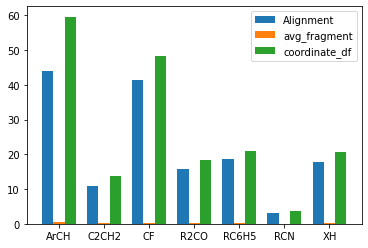

In [2]:
df = pd.read_csv('results/density_comp_time1.csv')

bars1 = df[df.central == "ArCI"]['alignment']
bars2 = df[df.central == "ArCI"]['avg_fragment']
bars3 = df[df.central == "ArCI"]['coordinate_df']

bar_width = 0.25  # the width of the bars
r1 = np.arange(len(bars1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# make that plot
fig, ax = plt.subplots()
rects1 = ax.bar(r1, bars1, bar_width, label='Alignment')
rects2 = ax.bar(r2, bars2, bar_width, label='avg_fragment')
rects3 = ax.bar(r3, bars3, bar_width, label='coordinate_df')

ax.set_xticks([r + bar_width for r in range(len(bars1))])
ax.set_xticklabels(df[df.central == "ArCI"]['contact'])

plt.legend()
plt.show()

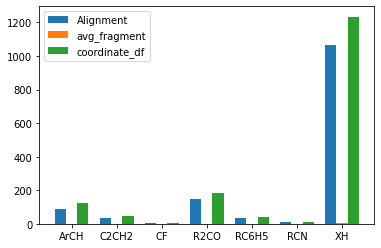

In [3]:
bars1 = df[df.central == "H2O"]['alignment']
bars2 = df[df.central == "H2O"]['avg_fragment']
bars3 = df[df.central == "H2O"]['coordinate_df']

bar_width = 0.25  # the width of the bars
r1 = np.arange(len(bars1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# make that plot
fig, ax = plt.subplots()
rects1 = ax.bar(r1, bars1, bar_width, label='Alignment')
rects2 = ax.bar(r2, bars2, bar_width, label='avg_fragment')
rects3 = ax.bar(r3, bars3, bar_width, label='coordinate_df')

ax.set_xticks([r + bar_width for r in range(len(bars1))])
ax.set_xticklabels(df[df.central == "H2O"]['contact'])

plt.legend()
plt.show()

,central,contact,to_count,resolution,density_time
0,ArCI,ArCH,H,0.1,77.685055
1,ArCI,ArCH,H,0.2,2.738797
2,ArCI,ArCH,H,0.3,1.193454
3,ArCI,ArCH,H,0.4,0.737936
4,ArCI,ArCH,H,0.5,0.595199
...,...,...,...,...,...
274,RC6F5,XH,H,0.6,0.565850
275,RC6F5,XH,H,0.7,0.522578
276,RC6F5,XH,H,0.8,0.506256
277,RC6F5,XH,H,0.9,0.501691


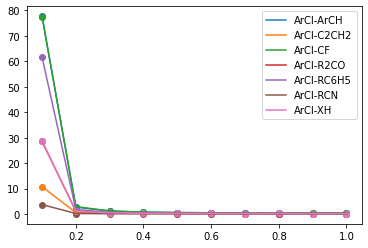

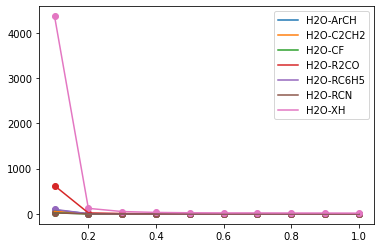

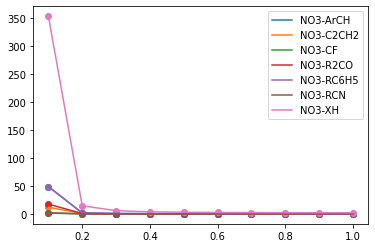

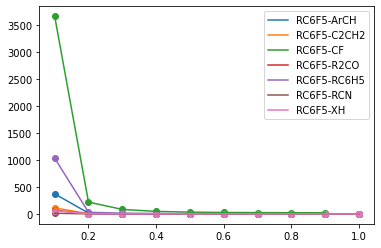

In [4]:
df2 = pd.read_csv('results/density_comp_time2.csv')
display(df2)

for central in central_groups:
    for contact, to_count_contact in zip(contact_groups, to_count):
        dfje = df2[(df2.central == central) & (df2.contact == contact)]
        plt.plot(dfje.resolution, dfje.density_time, label=central + '-' + contact)
        plt.scatter(dfje.resolution, dfje.density_time)
        
#     plt.ylim(0,10)
    plt.legend()
    plt.show()

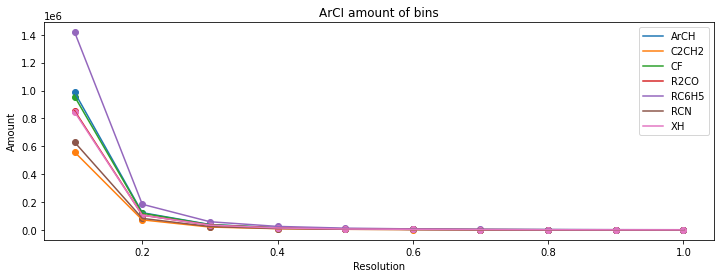

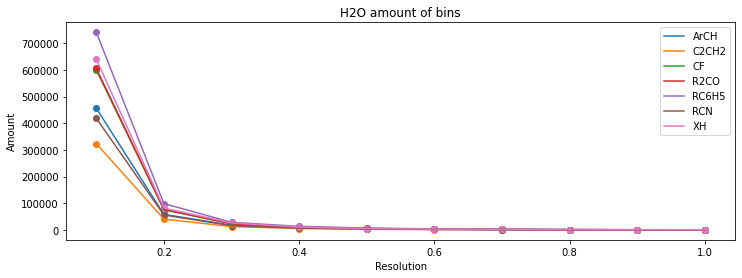

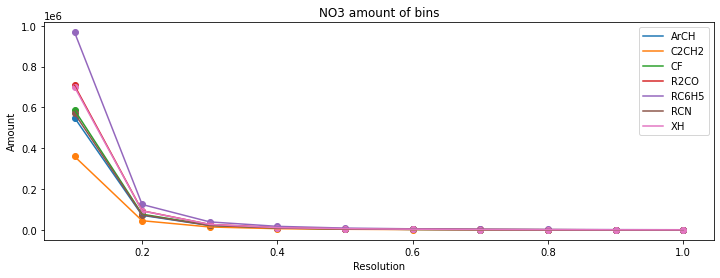

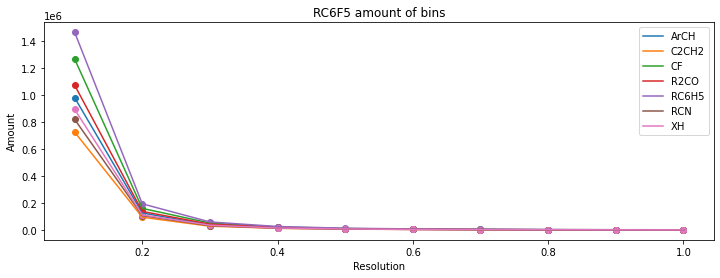

In [5]:
# plot the amount of cifs and fragments per combi
bins = []
emptybins = []

resolutions = np.arange(0.1, 1.1, 0.1)

for central_group in central_groups:
    # make that plot
    fig, ax = plt.subplots(figsize=(12,4))
        
    for to_count_contact, contact_group in zip(to_count, contact_groups):
        datafile = ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
        result1 = ".\\results\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5\\"\
                  + central_group + "_" + contact_group + "_vdw.5_aligned.csv"
        
        for resolution in resolutions:
            settings = Settings(datafile)
            settings.set_atom_to_count(to_count_contact)
            settings.set_resolution(round(resolution,2))

            density_df = pd.read_hdf(settings.get_density_df_filename(), settings.get_density_df_key())
            bins.append(len(density_df))

        plt.plot(resolutions, bins, label=contact_group)
        plt.scatter(resolutions, bins)
        bins = []
        
    plt.title(central_group + " amount of bins")
    plt.xlabel("Resolution")
    plt.ylabel("Amount")
#     plt.yscale('log')

    plt.legend()
    plt.show()

    

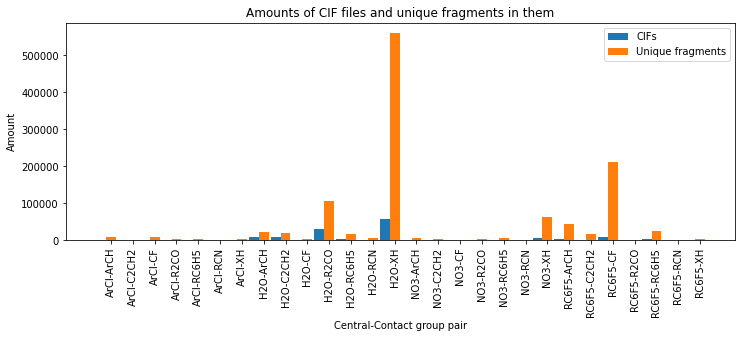

In [6]:
# plot the amount of cifs and fragments per combi
fragments = []
cifs = []
labels = []

bar_width = 0.45  # the width of the bars
r1 = np.arange(len(central_groups) * len(contact_groups))
r2 = [x + bar_width for x in r1]

for central_group in central_groups:
    for to_count_contact, contact_group in zip(to_count, contact_groups):      
        datafile = ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
        result1 = ".\\results\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5\\"\
                  + central_group + "_" + contact_group + "_vdw.5_aligned.csv"

        settings = Settings(datafile)
        settings.set_atom_to_count(to_count_contact)
        
        aligned_fragments_df = read_results_alignment(settings.get_aligned_csv_filename())
        
        fragments.append(len(aligned_fragments_df.id.unique()))
        cifs.append(len(aligned_fragments_df.entry_id.unique()))
        labels.append(central_group + "-" + contact_group)

# make that plot
fig, ax = plt.subplots(figsize=(12,4))
rects1 = ax.bar(r1, cifs, bar_width, label='CIFs')
rects2 = ax.bar(r2, fragments, bar_width, label='Unique fragments')

ax.set_xticks([r + bar_width for r in range(len(labels))])
ax.set_xticklabels(labels, rotation=90)

plt.title("Amounts of CIF files and unique fragments in them")
plt.xlabel("Central-Contact group pair")
plt.ylabel("Amount")
plt.legend()
plt.show()

# The data - gathering code


In [7]:
central_groups = ["NO3", "RC6F5"]

with open('density_comp_time1.csv', 'a', newline='') as resultsfile:
    writer = csv.writer(resultsfile)
    writer.writerow(['central', 'contact', 'to_count', 'alignment', 'avg_fragment', 'coordinate_df'])
    
    for central_group in central_groups:
        for to_count_contact, contact_group in zip(to_count, contact_groups):
            print(central_group, contact_group, to_count_contact)
            
            datafile = ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
            result1 = ".\\results\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5\\"\
                      + central_group + "_" + contact_group + "_vdw.5_aligned.csv"
            
            settings = Settings(datafile)
            settings.set_atom_to_count(to_count_contact)
            
            starttime = time.time()
            align_if_not_aligned_yet(settings, datafile)
            alignment_time = time.time() - starttime
            
            aligned_fragments_df = read_results_alignment(settings.get_aligned_csv_filename())
            avg_fragment = make_avg_fragment_if_not_exists(settings, aligned_fragments_df)
            avg_fragment_time = time.time() - starttime - alignment_time
            
            df = aligned_fragments_df[~aligned_fragments_df.in_central_group]
            coordinate_df = make_coordinate_df(df, settings, avg_fragment)
            coordinate_df_time = time.time() - starttime - avg_fragment_time
            
            writer.writerow([central_group, contact_group, to_count_contact, alignment_time, avg_fragment_time, coordinate_df_time])

NO3 ArCH H
.\results\NO3\NO3_ArCH_vdw.5\NO3_ArCH_vdw.5_aligned.csv already exists
NO3 C2CH2 H
.\results\NO3\NO3_C2CH2_vdw.5\NO3_C2CH2_vdw.5_aligned.csv already exists
NO3 CF F
.\results\NO3\NO3_CF_vdw.5\NO3_CF_vdw.5_aligned.csv already exists
NO3 R2CO O
.\results\NO3\NO3_R2CO_vdw.5\NO3_R2CO_vdw.5_aligned.csv already exists
NO3 RC6H5 centroid
.\results\NO3\NO3_RC6H5_vdw.5\NO3_RC6H5_vdw.5_aligned.csv already exists
NO3 RCN N
.\results\NO3\NO3_RCN_vdw.5\NO3_RCN_vdw.5_aligned.csv already exists
NO3 XH H
.\results\NO3\NO3_XH_vdw.5\NO3_XH_vdw.5_aligned.csv already exists
RC6F5 ArCH H
.\results\RC6F5\RC6F5_ArCH_vdw.5\RC6F5_ArCH_vdw.5_aligned.csv already exists
RC6F5 C2CH2 H
.\results\RC6F5\RC6F5_C2CH2_vdw.5\RC6F5_C2CH2_vdw.5_aligned.csv already exists
RC6F5 CF F
.\results\RC6F5\RC6F5_CF_vdw.5\RC6F5_CF_vdw.5_aligned.csv already exists
RC6F5 R2CO O
.\results\RC6F5\RC6F5_R2CO_vdw.5\RC6F5_R2CO_vdw.5_aligned.csv already exists
RC6F5 RC6H5 centroid
.\results\RC6F5\RC6F5_RC6H5_vdw.5\RC6F5_RC6H5_vdw.

In [8]:
import pandas as pd

with open('density_comp_time.csv', 'a', newline='') as resultsfile:
    writer = csv.writer(resultsfile)
    writer.writerow(['central', 'contact', 'to_count', 'resolution', 'density_time'])

    for central_group in central_groups:
        for to_count_contact, contact_group in zip(to_count, contact_groups):
            datafile = ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
            result1 = ".\\results\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5\\"\
                      + central_group + "_" + contact_group + "_vdw.5_aligned.csv"

            for resolution in resolutions:
                print("\nCalculating density for central group: ", central_group, " contact group: ", contact_group,
                      "resolution: ", str(round(resolution, 2)))
                
                starttime = time.time()
                
                settings = Settings(result1)
                settings.set_atom_to_count(to_count_contact)

                # resolution of the bins, in Angstrom
                settings.set_resolution(round(resolution, 2))

                df = read_results_alignment(settings.get_aligned_csv_filename())

                avg_fragment = make_avg_fragment_if_not_exists(settings, df)

                # grab only the atoms that are in the contact groups
                df_central = df[~df.in_central_group]
                coordinate_df = make_coordinate_df(df_central, settings, avg_fragment)

                try:
                    pd.read_hdf(settings.get_density_df_filename(), settings.get_density_df_key())
                except (FileNotFoundError, KeyError):
                    empty_density_df = prepare_df(df=coordinate_df, settings=settings)

                    density_df = count_points_per_square(df=empty_density_df, contact_points_df=coordinate_df, settings=settings)

                    # save so we can use the data but only change the plot - saves time :)
                    density_df.to_hdf(settings.get_density_df_filename(), settings.get_density_df_key())               

                    writer.writerow([central_group, contact_group, to_count_contact, resolution, time.time()-starttime])


Calculating density for central group:  NO3  contact group:  ArCH resolution:  0.1

Calculating density for central group:  NO3  contact group:  ArCH resolution:  0.2

Calculating density for central group:  NO3  contact group:  ArCH resolution:  0.3

Calculating density for central group:  NO3  contact group:  ArCH resolution:  0.4

Calculating density for central group:  NO3  contact group:  ArCH resolution:  0.5

Calculating density for central group:  NO3  contact group:  ArCH resolution:  0.6

Calculating density for central group:  NO3  contact group:  ArCH resolution:  0.7

Calculating density for central group:  NO3  contact group:  ArCH resolution:  0.8

Calculating density for central group:  NO3  contact group:  ArCH resolution:  0.9

Calculating density for central group:  NO3  contact group:  ArCH resolution:  1.0

Calculating density for central group:  NO3  contact group:  C2CH2 resolution:  0.1

Calculating density for central group:  NO3  contact group:  C2CH2 resolut


Calculating density for central group:  RC6F5  contact group:  CF resolution:  0.9

Calculating density for central group:  RC6F5  contact group:  CF resolution:  1.0

Calculating density for central group:  RC6F5  contact group:  R2CO resolution:  0.1

Calculating density for central group:  RC6F5  contact group:  R2CO resolution:  0.2

Calculating density for central group:  RC6F5  contact group:  R2CO resolution:  0.3

Calculating density for central group:  RC6F5  contact group:  R2CO resolution:  0.4

Calculating density for central group:  RC6F5  contact group:  R2CO resolution:  0.5

Calculating density for central group:  RC6F5  contact group:  R2CO resolution:  0.6

Calculating density for central group:  RC6F5  contact group:  R2CO resolution:  0.7

Calculating density for central group:  RC6F5  contact group:  R2CO resolution:  0.8

Calculating density for central group:  RC6F5  contact group:  R2CO resolution:  0.9

Calculating density for central group:  RC6F5  contact gr